In [2]:
 ## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
from PIL import Image
import os
import torch
import torchvision
import cv2
import argparse
import numpy as np
import random
import skimage
import matplotlib.pyplot as plt
from torchvision.transforms import transforms as transforms
from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage import io, segmentation, color
from skimage.io import imread
from skimage.util import img_as_ubyte
from skimage.util import img_as_float
from skimage.segmentation import mark_boundaries
from skimage.filters import sobel
from sklearn.cluster import KMeans
import torchvision.transforms.functional as F
from skimage.color import rgb2lab
import math
from skimage.color import rgb2hsv

Original Image (Left) & Superpixel with the highest hue (Right):


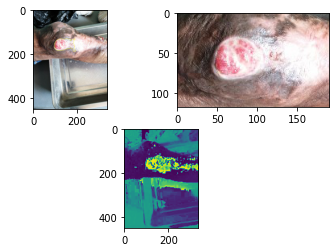

In [77]:
images = 'CD00000016_20200622082417_0002_20200810090710_20200810_090712.jpg'

#folder = images[0:10]

image_path = '/content/drive/MyDrive/Skin_Disease/BU23/' + images + ''

sk_image = io.imread(image_path)

segment_slic = slic(sk_image, n_segments=60, compactness=20, sigma=1, start_label=0)


hsv_img = rgb2hsv(sk_image)
hue_img = hsv_img[:, :, 0]

lists = []
for index in np.unique(segment_slic):
  hue_mask = (segment_slic == index)
  sk_mask = sk_image[hue_mask]
  sk_mask = sk_mask.reshape(-1,1,3)
  hsv_mask = color.rgb2hsv(sk_mask)
  hues = np.average(hsv_mask[:,:,0],axis=0)
  lists.append(hues)

#find superpixel with the highest hue
max_hue = np.argmax(lists)

max_hue_segment = segment_slic == max_hue

bbox = np.array([np.min(np.where(max_hue_segment)[0]),
                 np.max(np.where(max_hue_segment)[0]),
                 np.min(np.where(max_hue_segment)[1]),
                 np.max(np.where(max_hue_segment)[1])])


#find middle of bouuding box
middle = np.array([bbox[2]+(bbox[3]-bbox[2])/2,bbox[0]+(bbox[1]-bbox[0])/2 ])

# Compute the new bounding box with 2x larger width and height
new_bbox = np.array([middle[0] - (bbox[3] - bbox[2]),
                     middle[0] + (bbox[3] - bbox[2]),
                    middle[1] - (bbox[1] - bbox[0]),
                     middle[1] + (bbox[1] - bbox[0])])

#round bbox so it can crop new image 
final_bbox = np.round(new_bbox).astype(int)

#apply new crop
cropped = sk_image.copy()[final_bbox[2]:final_bbox[3], final_bbox[0]:final_bbox[1]]


print('Original Image (Left) & Superpixel with the highest hue (Right):')
plt.subplot(2, 1, 2)
plt.imshow(hue_img)
plt.subplot(2, 2, 1)
plt.imshow(mark_boundaries(sk_image,max_hue_segment))

plt.subplot(2, 2, 2)
plt.imshow(cropped)


plt.show()
